#**EMPLOYEE ATTRITION ANALYSIS**

An approach to predict whether the employee is likely to leave the company or continue to work and thereby reduce attrition rate

---



KEYUR_PARKHI

GOURISH_SALGAONKAR

DEV_VATNANI

---



**Dataset Information**
This dataset consists of 14999 observations with 9 features and 1 target variable *("Target")*.


##### To view the complete dataset : [DATA](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction)

##### Note: We renamed the target column "left" from the original dataset to "Target" for better readability of the dataset.




---

**Attribute Information:**
A detailed explanation of all the columns in the dataset:  

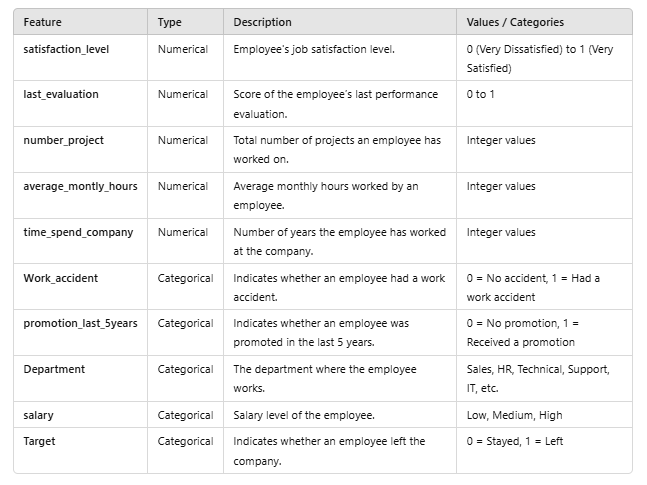


# Objectives:

1. Understand Factors Affecting Attrition
   - Identify key factors contributing to employee departures.  
   - Assess how work conditions (projects, hours, satisfaction) impact attrition.  

2. Predict Employee Turnover
   - Develop a predictive model to classify employees as likely to leave or stay.  
   - Use historical data to improve employee retention strategies.  

3. Department & Salary Impact Analysis
   - Evaluate which departments have higher attrition rates.  
   - Determine if salary level is a significant factor in attrition.  
---

# Approach:
1. Exploratory Data Analysis (EDA)
   - Check for missing values and clean the data.
   - Perform summary statistics and visualizations to find patterns.  

2. Feature Engineering & Selection
   - Identify the most important features influencing attrition.  
   - Convert categorical variables (e.g., department, salary) into numerical values.
   -
 Perform feature scaling (min-max scaling or standardization) of numerical variables.

3. Modeling & Prediction
   - Train machine learning models (KNN Classifier, Logistic Regression, Decision Trees Classifier, Random Forest Classifier) to predict attrition.  
   - Evaluate model performance using accuracy, precision, recall, F1-score, ROC-AUC Curve and ROC Score and performing necessary Hyperparameter tuning for improvement in model performance.  

4. Insights & Recommendations
   - Provide actionable insights for HR to reduce attrition.  
   - Suggest strategies based on key findings.  

---

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing dataset
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Target
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   Target                 14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


It identifies the Work_accident, promotion_last_5years, and Target columns as integer columns, despite them being categorical.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


It implies that there are no missing values in the dataset.

In [ ]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Manually convert integer categorical columns
int_categorical_cols = ["Work_accident", "promotion_last_5years","Target"]
df[int_categorical_cols] = df[int_categorical_cols].astype('category')
categorical_cols.extend(int_categorical_cols)
numerical_cols = [col for col in numerical_cols if col not in int_categorical_cols]
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Department', 'salary', 'Work_accident', 'promotion_last_5years', 'Target']
Numerical Columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


In [ ]:
# Proportion of Value counts for categorical columns
cat_cols = ['Department', 'salary', 'Work_accident', 'promotion_last_5years','Target']
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(normalize=True))
    print()

Value counts for Department:
Department
sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: proportion, dtype: float64

Value counts for salary:
salary
low       0.487766
medium    0.429762
high      0.082472
Name: proportion, dtype: float64

Value counts for Work_accident:
Work_accident
0    0.85539
1    0.14461
Name: proportion, dtype: float64

Value counts for promotion_last_5years:
promotion_last_5years
0    0.978732
1    0.021268
Name: proportion, dtype: float64

Value counts for Target:
Target
0    0.761917
1    0.238083
Name: proportion, dtype: float64



In the given scenario, we are dealing with an imbalanced dataset. The proportion of negative instances is more than 3 times that of the positive instances.

In [ ]:
# Summary statistics for numerical columns
df.describe(include="number")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000




*   Employees who left likely had lower satisfaction levels on average.
*   Some employees who left might have had either very low or very high evaluation scores.

*   Employees with extremely low (2 projects) or very high (7 projects) workloads may have left.
*   Employees who worked too few (96) or too many (310) hours might have left.

*   Employees who had higher tenure (e.g., 5+ years) or short tenure (2 years), might have left.







In [ ]:
# Summary statistics for categorical columns
df.describe(include="object")

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316




*   Most employees (12,830 out of 14,999) did not have an accident.

*    Very few employees (319 out of 14,999) got a promotion.
*   Sales had the highest count (4,140).


*   Most employees had low salaries (7,316 out of 14,999).



<Figure size 1200x800 with 0 Axes>

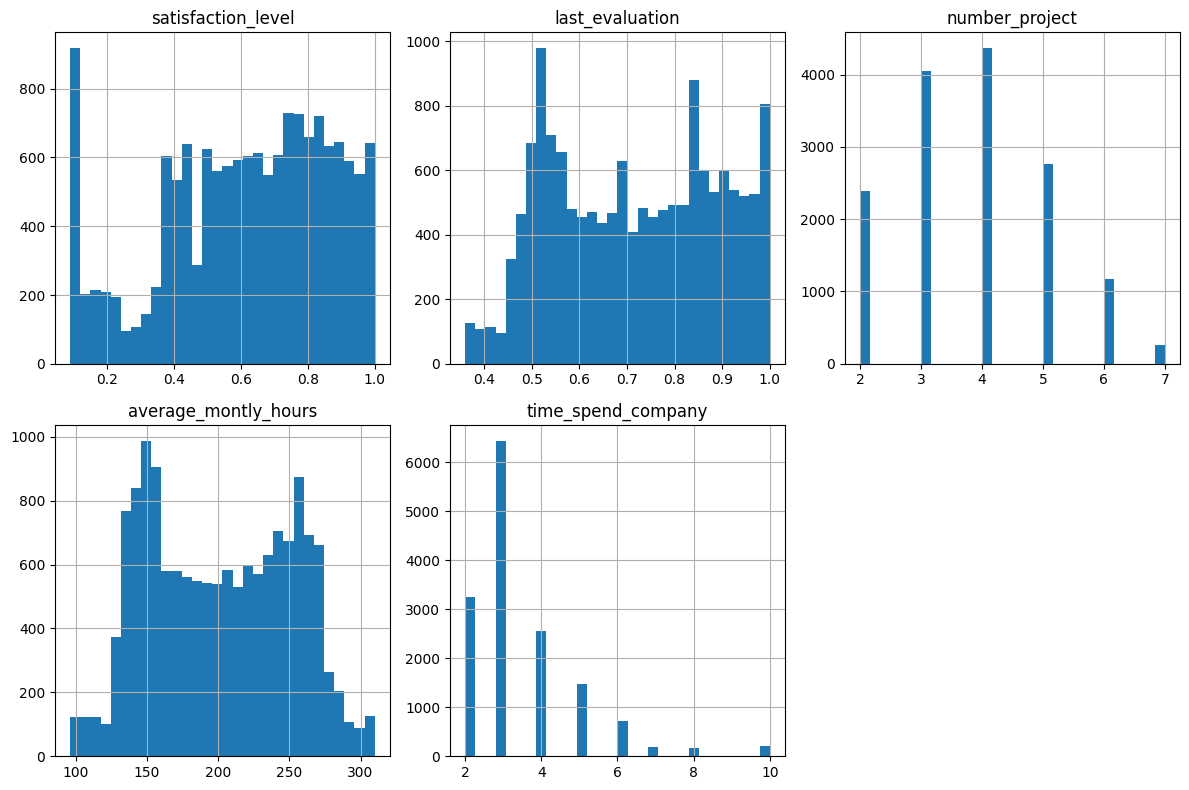

In [ ]:
# Histograms for numerical variables
plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=30, figsize=(12, 8), layout=(len(numerical_cols)//3 + 1, 3))
plt.tight_layout()
plt.show()



*   **Satisfaction levels**  
   - There is a concentration of employees with very low satisfaction levels.  
   - The rest of the distribution appears more spread out across different levels of satisfaction.  
   - Employees with extremely low satisfaction may have a higher chance of leaving.


*   **Last Evaluation**
  
   - There are peaks around 0.52 and 1.0, indicating that many employees received either very low or very high evaluations.  
   - This suggests two groups: one possibly underperforming and another possibly overworked.
   - Employees with low evaluations may leave due to underperformance.
   - Employees with high evaluations might leave for better opportunities.
*   **Number of Projects**

   - Most employees have worked on 2 to 5 projects, with peaks at 3 and 4 projects.  
   - Underworked employees (working on few projects) may leave due to lack of growth.
   - Overburdened employees (working on 6+ projects) might feel stressed and leave.
*   **Average Monthly Hours**
   - The distribution is *bimodal*, meaning two distinct groups exist:
     - One group works around 150-200 hours per month. Underworked employees may feel underutilized or disengaged.
     - Another group works 250+ hours per month, indicating potential overwork. Overworked employees could be more likely to quit due to burnout.

*   **Time spent at company**
   - If most employees who left had higher tenure (e.g., 5+ years), indicating a higher attrition rate after a certain period. They might have sought career growth elsewhere.
  - Employees with short tenure (2 years) leaving could indicate early dissatisfaction.





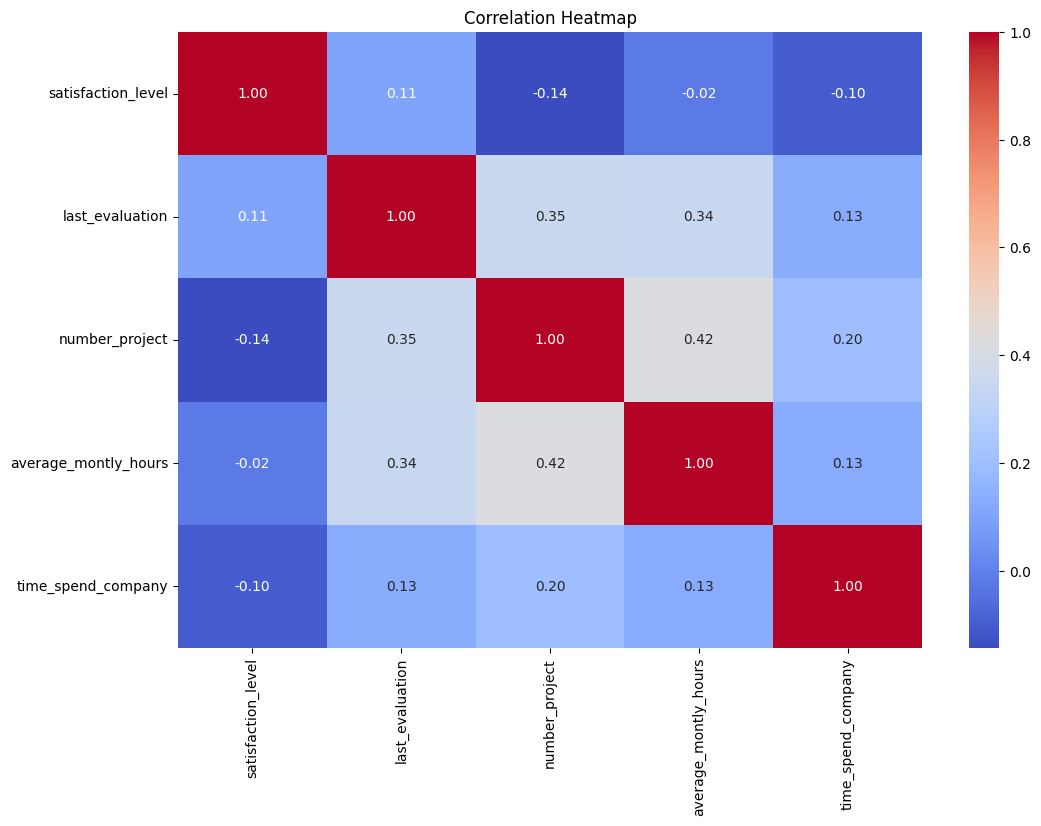

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap suggests that:


*   **satisfaction_level** is slightly negatively correlated with **number_project** (-0.14) and **time_spend_company** (-0.10), meaning employees who work on more projects or stay longer tend to be slightly less satisfied.
*   **last_evaluation** has a moderate positive correlation with **number_project** (0.35) and **average_monthly_hours** (0.34), suggesting that employees who work on more projects and spend more time working tend to get higher performance evaluations.

*   **number_project** and **average_monthly_hours** have a noticeable correlation (0.42), meaning employees handling more projects generally work more hours.
*   **time_spend_company** has weak correlations with other variables, meaning it doesn't strongly influence satisfaction, evaluation, or workload.






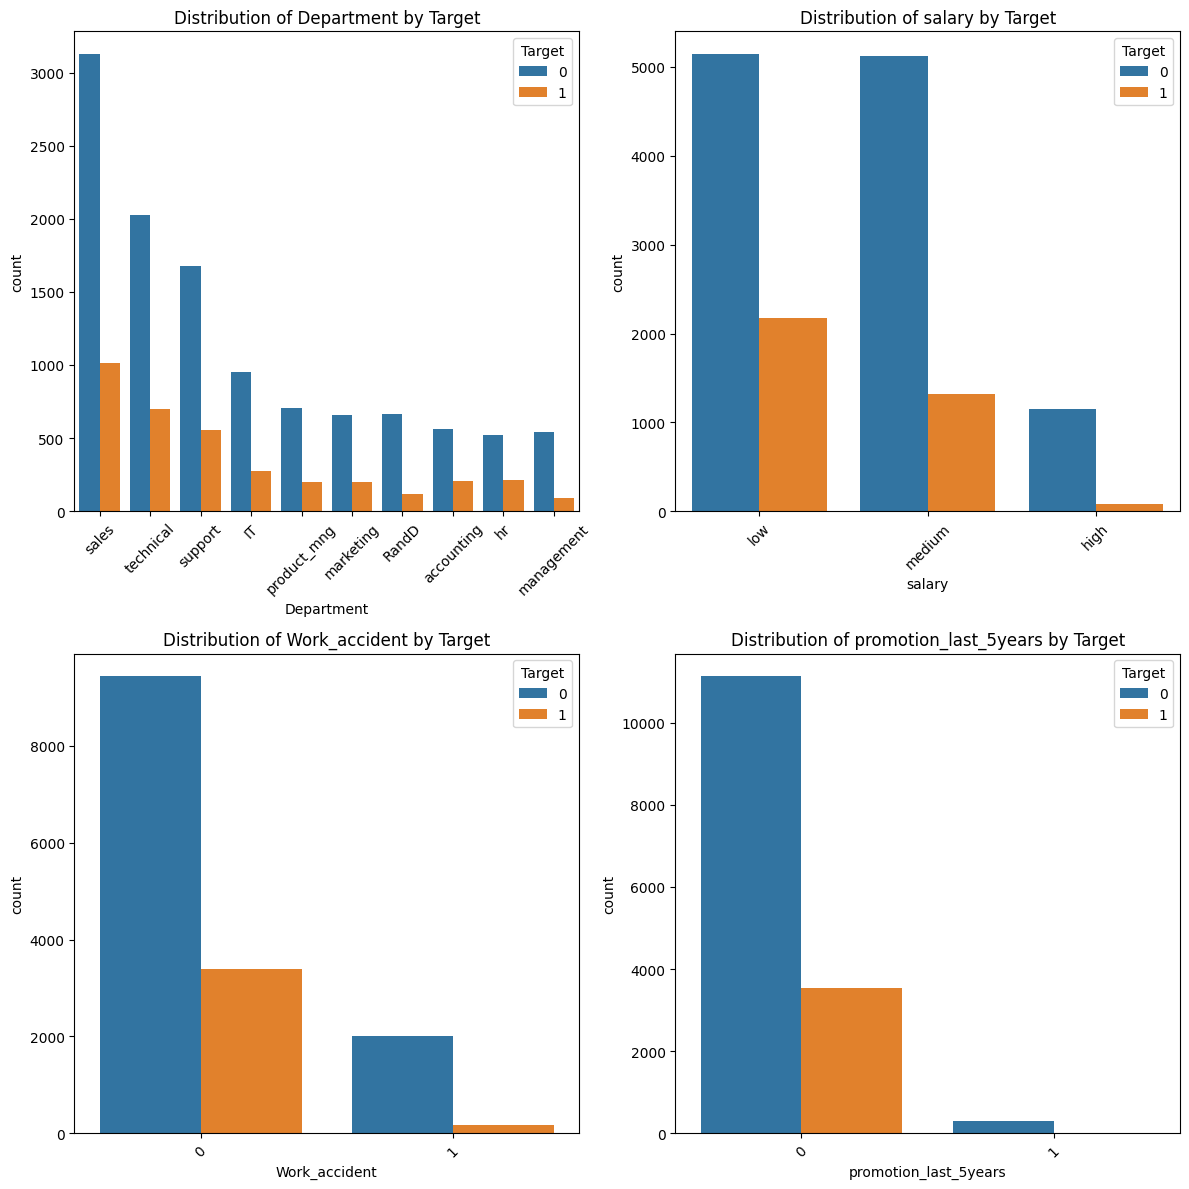

In [ ]:
# Relationship between categorical features and target variable
target_var = 'Target'
if target_var in categorical_cols:
    cat_features = [col for col in categorical_cols if col != target_var]
    num_plots = len(cat_features)
    rows = (num_plots // 2) + (num_plots % 2)
    fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_features):
        sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f"Distribution of {col} by {target_var}")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

The distribution plots suggests that:
   

*   Departments like Sales, Technical, and Support might have more employees but also possibly higher attrition.
*   Employees with low salaries may be more likely to leave compared to those with medium or high salaries.
*   Work accidents do not appear to be a major factor in employee attrition, as the number of employees who left after having an accident is quite small.
*   The majority of employees did not receive a promotion in the last five years which may indicate that lack of promotions might be a contributing factor to employees leaving.







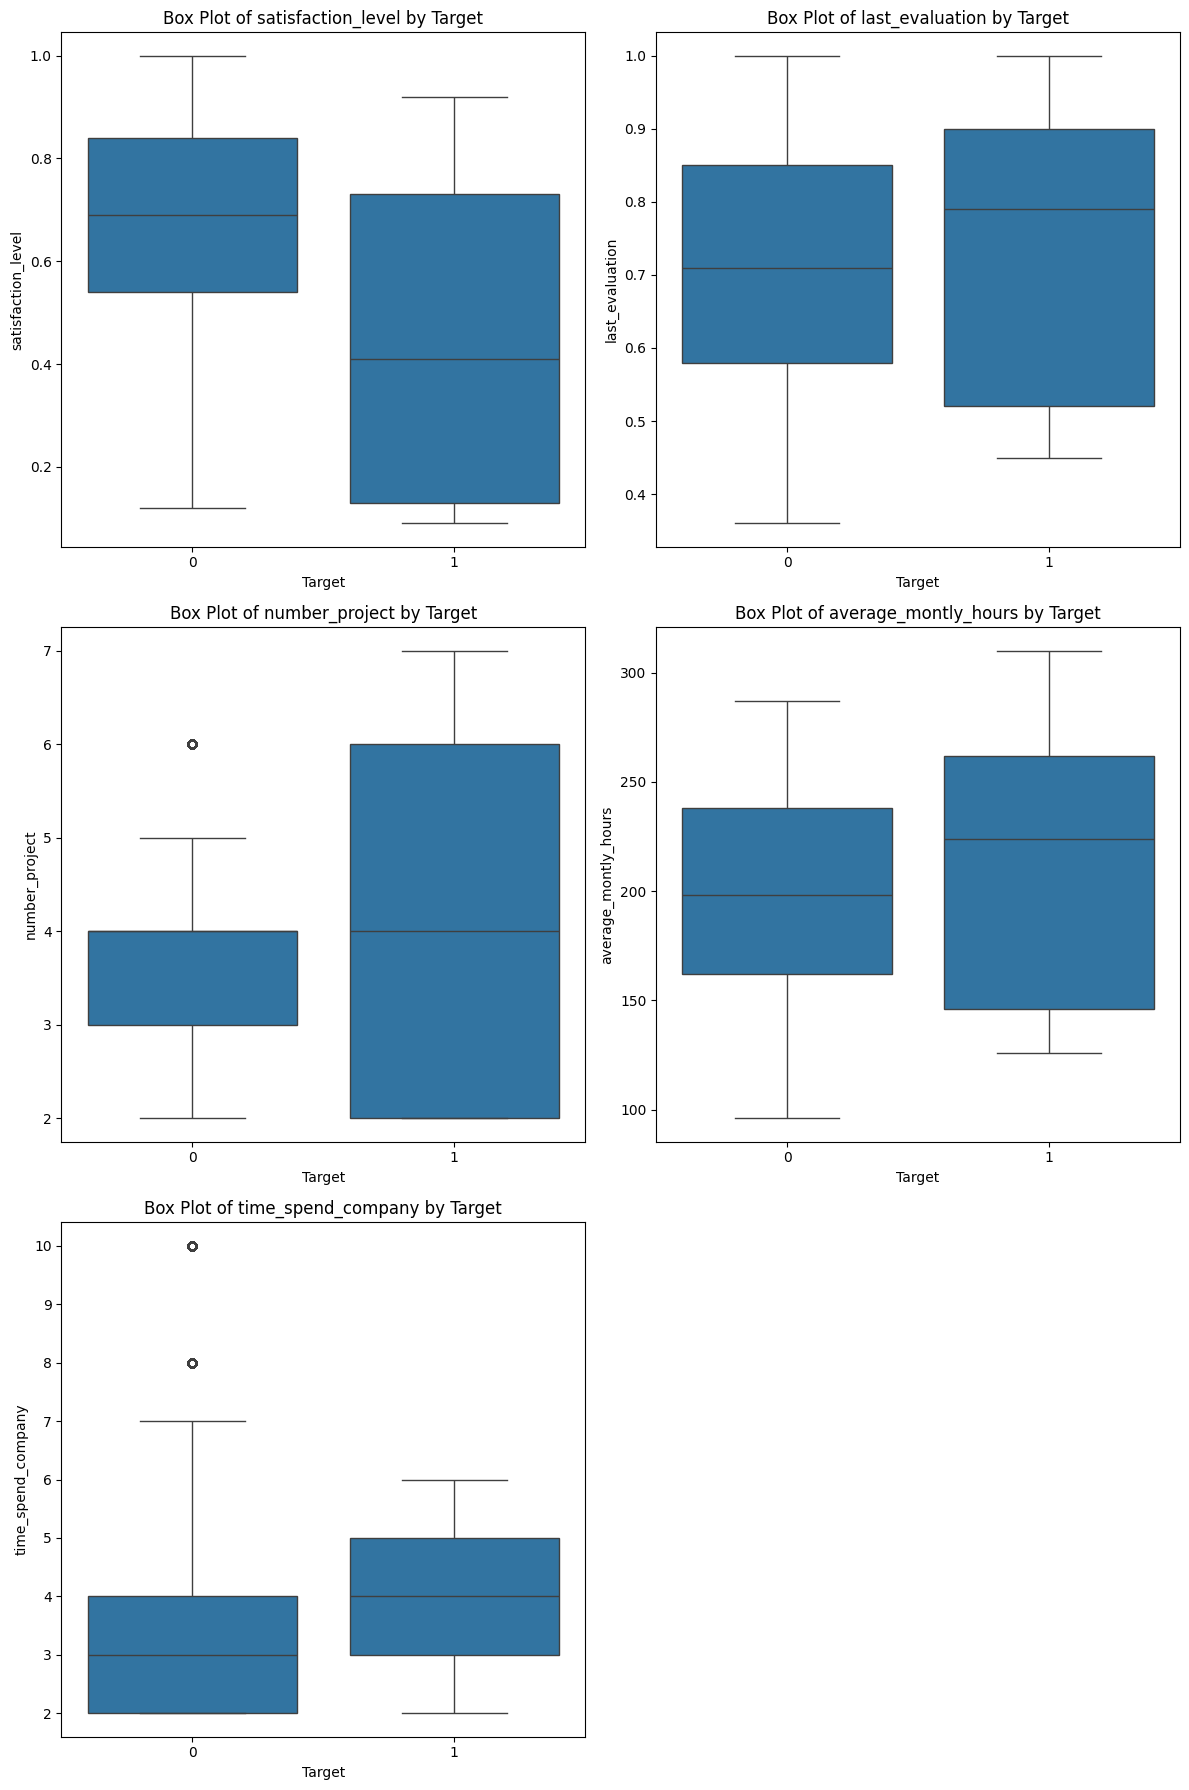

In [ ]:
# Relationship between numerical features and target variable
if target_var in df.columns:
    num_plots = len(numerical_cols)
    rows = (num_plots // 2) + (num_plots % 2)
    fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))

    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(data=df, x=target_var, y=col, ax=axes[i])
        axes[i].set_title(f"Box Plot of {col} by {target_var}")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

The boxplot suggests the following relations:
1. Satisfaction level are inversely propotional to the attrition rate (More satisfaction implies less employees leaving the company)
2. Last evaluation tells us that the employees leave more when they have a low performance score.
3. Higher number of projects imply a high attrition rate
4. Also, the number of hours worked per month have a direct relation with attrition rates (more hours worked implies more employees leaving the company)
5. Time spent has a direct impact on attrition (Although there are exceptions, who work more hours and still stay in the company)

### Validation of Assumptions:
The important assumptions for all the classifier models considered here that need to be validated are:


1.   Multicollinearity existing among the features
2.   Normality of the data



In [ ]:
# 1. Check for multicollinearity
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

num_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
X = df[num_cols]
X = sm.add_constant(X)

# Compute VIF for each numerical predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)



# 2. Check for Normality
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Shapiro-Wilk test to each column separately
for i in range(1,6):
    stat, p = shapiro(X_scaled[:, i])
    print(f"Shapiro-Wilk Test for Feature {i}: Statistic={stat}, p-value={p}")

    if p > 0.05:
        print(" -> Likely normal distribution ")
    else:
        print(" -> Not normally distributed ")

                Feature        VIF
0                 const  35.667463
1    satisfaction_level   1.058449
2       last_evaluation   1.239933
3        number_project   1.352211
4  average_montly_hours   1.278863
5    time_spend_company   1.054774
Shapiro-Wilk Test for Feature 1: Statistic=0.9518945472678346, p-value=3.1637031058241156e-56
 -> Not normally distributed 
Shapiro-Wilk Test for Feature 2: Statistic=0.9522051139840794, p-value=4.173381497944661e-56
 -> Not normally distributed 
Shapiro-Wilk Test for Feature 3: Statistic=0.9216419484449008, p-value=1.1401408166109706e-65
 -> Not normally distributed 
Shapiro-Wilk Test for Feature 4: Statistic=0.9633654336916024, p-value=2.784782234183072e-51
 -> Not normally distributed 
Shapiro-Wilk Test for Feature 5: Statistic=0.7930097464153898, p-value=1.0248726896774422e-86
 -> Not normally distributed 


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14999.
  res = hypotest_fun_out(*samples, **kwds)


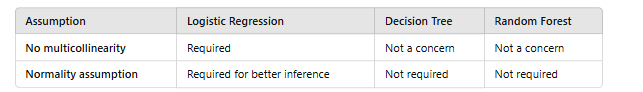

*   **Note:** KNN Classifier does not make assumptions about the underlying data distribution. No multicollinearity is observed among the numerical features and Shapiro-Wilk test suggests that the data is not normally distributed, with reference to the above table we can proceed with using KNN Classifier, Logistic Regression, Decision Tree Classifier and Random Forest Classifier for achieving necessary classification results for our dataset.



## Model training, Hyperparameter tuning, Model evaluation and selection

In [ ]:
# Importing required libraries and algorithms
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Splitting data into features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define numerical and categorical columns
num_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
cat_cols = ['Department', 'salary']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ], remainder='passthrough')

**Note:** It is a general practice that, if the data distribution is not normal, or we have a bounded dataset i.e. values for certain columns lying within a specific range, we perform min-max scaling (transforms values in the range [0,1]) of the numerical features.

In [ ]:
# To verify the feature scaling (Min-Max scaling for numerical features) and encoding (One Hot Encoding for categorical features) done
# Fit the preprocessor on training data and transform
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_scaled_encoded_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
# Results
X_train_scaled_encoded_df.head()

,num__satisfaction_level,num__last_evaluation,num__number_project,num__average_montly_hours,num__time_spend_company,cat__Department_RandD,cat__Department_accounting,cat__Department_hr,cat__Department_management,cat__Department_marketing,cat__Department_product_mng,cat__Department_sales,cat__Department_support,cat__Department_technical,cat__salary_low,cat__salary_medium,remainder__Work_accident,remainder__promotion_last_5years
0,0.010989,0.75,1.0,0.719626,0.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
1,0.527473,0.5,0.4,0.271028,0.125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
2,0.32967,0.1875,0.0,0.271028,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
3,0.901099,0.5,0.4,0.168224,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
4,0.802198,0.953125,0.6,0.780374,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0


In [ ]:
X_test_transformed = preprocessor.transform(X_test)
X_test_scaled_encoded_df = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())
# Results
X_test_scaled_encoded_df.head()

,num__satisfaction_level,num__last_evaluation,num__number_project,num__average_montly_hours,num__time_spend_company,cat__Department_RandD,cat__Department_accounting,cat__Department_hr,cat__Department_management,cat__Department_marketing,cat__Department_product_mng,cat__Department_sales,cat__Department_support,cat__Department_technical,cat__salary_low,cat__salary_medium,remainder__Work_accident,remainder__promotion_last_5years
0,0.615385,0.9375,0.6,0.607477,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
1,0.868132,0.6875,0.2,0.327103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
2,0.659341,0.96875,0.2,0.551402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
3,0.351648,0.171875,0.0,0.271028,0.125,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
4,0.857143,0.625,0.6,0.738318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0


#### Selecting the appropriate threshold value for classification (0 : stayed, 1 : left):
##### Our goal is to identify those employees who are actually leaving but model predicts their status otherwise (False Negatives) as missing such employees would prove costly. Hence, we choose a lower threshold (e.g. 0.3–0.4) to increase recall.


Model: Logistic Regression
Best Parameters: {}
Train Accuracy: 0.7922659300885798
Test Accuracy: 0.7851111111111111
Overfitting Check (Train - Test Accuracy): 0.007154818977468724
Confusion Matrix:
 [[3174  254]
 [ 713  359]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      3428
           1       0.59      0.33      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500


Model: Decision Tree
Best Parameters: {'classifier__max_depth': 10}
Train Accuracy: 0.9883798456995905
Test Accuracy: 0.9771111111111112
Overfitting Check (Train - Test Accuracy): 0.011268734588479323
Confusion Matrix:
 [[3391   37]
 [  66 1006]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3428
           1       0.96      0.94      0.

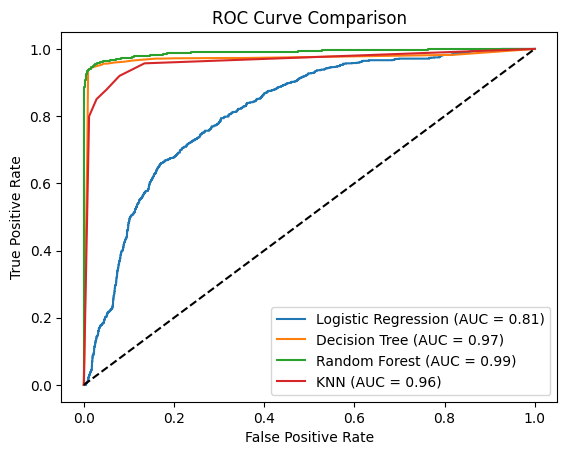

In [ ]:
# Model Training with Hyperparameter Tuning & Calculating evaluation metrics
param_grid = {
    "Logistic Regression": {},
    "Decision Tree": {"classifier__max_depth": [3, 5, 10]},
    "Random Forest": {"classifier__n_estimators": [50, 100, 200], "classifier__max_depth": [3, 5, 10]},
    "KNN": {"classifier__n_neighbors": [3, 5, 7, 9]}
}

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

best_models = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    y_train_pred = grid_search.best_estimator_.predict(X_train)
    y_test_pred = grid_search.best_estimator_.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"\nModel: {name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Overfitting Check (Train - Test Accuracy):", train_accuracy - test_accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("=====================================================================")


    # ROC AUC Curve
    if hasattr(best_models[name], "predict_proba"):
        y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plotting ROC Curve for all models
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

### Selecting the best evaluation metric :
*   Since, in this scenario, we are dealing with an imbalanced dataset, **Accuracy** is misleading because it focuses on overall correctness, which can be dominated by the majority class (0).

*   Since, we focus **more on employees who left** and affect the attrition rates, hence evaluation metrics for **class 1** **(precision, recall, f1-score, macro average, weighted average)** would be helpful.

*   On similar lines, since we do not provide **equal** weightage to both classes, hence **macro average metrics** may not be an appropriate evaluation metric to be assessed.
*   Even if we account for the imbalanced nature of the dataset while prioritizing overall model performance and calculate **weighted average metrics**, it may not be an appropriate evaluation metric here since it does not align with our goal to reduce the attrition rates.


*   Our goal is to reduce attrition rates (people who left) the company hence, our more focus should be on those employees who are actually leaving, but the model incorrectly predicts them that they would stay back **(False Negatives)**. Hence, the best evaluation metric for our case, would be **Recall for Class 1 (left)** as it will help us to control the attrition rate successfully. It will help us identify those employees who are leaving but are incorrectly predicted which aligns with our goal and hence better strategies can be implemented so that this attrition rate can be controlled.

---
















### Model evaluation and best Model selection:

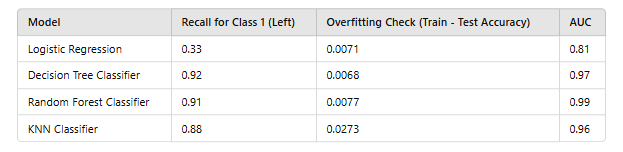





#### **Note:** Even though Decision Tree classifier has lower overfitting and slightly high recall value compared to Random Classifier, the AUC score is lesser. Hence, the **best model** in this scenario that would help to reduce employee attrition rates is **Random Forest Classifier**.


---







### Suggestions to reduce Employee Attrition that HR can implement:
1. **Job Satisfaction Matters**
*   **Finding:** Employees who aren’t happy with their jobs are more likely to leave.
*   **Strategy:** Regularly ask employees how they feel about their jobs and act on their feedback. Recognize their efforts, offer chances to grow, and allow flexible working options.


2. **Work-Life Balance is Important**

*  **Finding:** Employees working too much or too little are more likely to quit.
*   **Strategy:** Make sure employees have a healthy work-life balance. Allow
flexible work hours, remote work, and wellness programs.

3. **High Performers May Leave**

*   **Finding:** Even top employees leave when they don’t see career growth.
*   **Strategy:** Give them clear career paths, mentorship programs, and leadership training to help them grow within the company.
4. **Salary Impacts Retention**

*  **Finding:** Employees with lower salaries leave more often.
*  **Strategy:** Regularly check industry pay standards and adjust salaries to
stay competitive. Provide bonuses and stock options to keep employees motivated.

5. **Promotions Matter**


*  **Finding:** Employees who don’t get promoted tend to leave.
*  **Strategy:** Be transparent about how promotions work. Offer regular skill development and training so employees feel they have opportunities to grow.

6. **Some Departments Lose More Employees**


* **Finding:** Certain teams have higher turnover rates.
* **Strategy:** Identify which departments are losing employees and find out why. Fix issues like heavy workload, poor management, or lack of support.

### Recommendations:

*  Implement AI-based predictive analytics to identify at-risk employees and address concerns.
*  Introduce exit interviews and stay interviews to understand why employees leave and stay.
*  Foster a culture of appreciation and inclusivity to improve employee morale.

---

### Challenges:


*   OneHotEncoder was used for encoding categorical variables, which can lead to high-dimensional data (curse of dimensionality).

*   Models fitted on imbalanced dataset might require F1-score or precision-recall for evaluation instead of Accuracy. As the data was imbalanced, SMOTE or other sampling techniques can be used for Model Training.

*   If certain classes (e.g., employees likely to leave) are underrepresented, the model might misclassify them.

*   Deciding the threshold value for classification of employees who will stay back or leave, was a challenge.

